In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import findex data

In [2]:
# Specify the file path
file_path = '/Users/MarvelynAbigail/Documents/Summer 2025/Account Ownership/Findex_ASEAN.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Preview the data
df.head()

,Country ID,Country Name,Indicator,2011,2014,2017,2021,2022,2024
0,IDN,Indonesia,"Account ownership, female",19.207536,37.464034,51.354918,52.304523,NaN,58.030845
1,IDN,Indonesia,"Account ownership, male",19.967238,34.617927,46.245716,51.181518,NaN,54.638812
2,IDN,Indonesia,"Account ownership, total",19.581991,36.058989,48.857451,51.755324,NaN,56.327849
3,KHM,Cambodia,"Account ownership, female",NaN,20.497634,21.526393,32.524222,NaN,36.798884
4,KHM,Cambodia,"Account ownership, male",NaN,24.289041,21.845457,34.411927,NaN,41.580571


Import supporting data

In [3]:
# Define the paths (replace with your full paths if needed)
file_population = '/Users/MarvelynAbigail/Documents/Summer 2025/Account ownership/Dataset/API_SP.POP.TOTL_DS2_en_excel_v2_38348.xls'
file_gdp = '/Users/MarvelynAbigail/Documents/Summer 2025/Account ownership/Dataset/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_38334.xls'

# Read the files
df_pop = pd.read_excel(file_population)
df_gdp = pd.read_excel(file_gdp)

# Check data
print("Population Data:")
print(df_pop.head())

print("\nGDP Data:")
print(df_gdp.head())

Population Data:
                  Country Name Country Code     Indicator Name         1960  \
0                        Aruba          ABW  Population, total      54922.0   
1  Africa Eastern and Southern          AFE  Population, total  130075728.0   
2                  Afghanistan          AFG  Population, total    9035043.0   
3   Africa Western and Central          AFW  Population, total   97630925.0   
4                       Angola          AGO  Population, total    5231654.0   

          1961         1962         1963         1964         1965  \
0      55578.0      56320.0      57002.0      57619.0      58190.0   
1  133534923.0  137171659.0  140945536.0  144904094.0  149033472.0   
2    9214083.0    9404406.0    9604487.0    9814318.0   10036008.0   
3   99706674.0  101854756.0  104089175.0  106388440.0  108772632.0   
4    5301583.0    5354310.0    5408320.0    5464187.0    5521981.0   

          1966  ...         2015         2016         2017         2018  \
0      58694

In [4]:
# check current dtype and values
print(df[2024].dtype)
print(df[2024])

# convert column 2024 to numeric safely, replacing invalids with 0
df.loc[:, 2024] = pd.to_numeric(df[2024], errors='coerce').fillna(0)

# check again
print(df[2024].dtype)
print(df[2024])

float64
0     58.030845
1     54.638812
2     56.327849
3     36.798884
4     41.580571
5     39.031443
6     43.586503
7     31.709979
8     37.650197
9           NaN
10          NaN
11          NaN
12    88.226470
13    89.141358
14    88.691801
15    57.101611
16    43.042400
17    50.182422
18    97.607834
19    98.022859
20    97.819091
21    92.700069
22    90.918245
23    91.824981
24    69.884416
25    71.249331
26    70.550753
27    56.029753
28    56.666099
29    34.038205
30    65.241773
31    36.415864
32    63.992379
33    87.660140
34    89.588584
35    46.455395
36    56.572578
37    97.819091
38    92.321667
39    90.716247
40    67.368034
41    77.013452
Name: 2024, dtype: float64
float64
0     58.030845
1     54.638812
2     56.327849
3     36.798884
4     41.580571
5     39.031443
6     43.586503
7     31.709979
8     37.650197
9      0.000000
10     0.000000
11     0.000000
12    88.226470
13    89.141358
14    88.691801
15    57.101611
16    43.042400
17    50.1824

In [5]:
print(df[df[2024].isna()])

Empty DataFrame
Columns: [Country ID, Country Name, Indicator, 2011, 2014, 2017, 2021, 2022, 2024]
Index: []


# Account Ownership (% of Adults)

In [6]:
import plotly.express as px

In [7]:
print(df.columns.tolist())

['Country ID', 'Country Name', 'Indicator', 2011, 2014, 2017, 2021, 2022, 2024]


In [8]:
#Sort it descending
df = df.sort_values(2024, ascending=False)

In [9]:
cols = [2011, 2014, 2017, 2021, 2024]

# keep rows where at least one year is not null and not zero
df_plot = df[
    df[cols].apply(lambda row: ((row.notna()) & (row != 0)).any(), axis=1)
]

In [10]:
# ✅ Keep only the TOTAL account ownership rows
df_total = df_plot[df_plot['Indicator'] == 'Account ownership, total'].copy()

# ✅ Clean column names
df_total.columns = df_total.columns.astype(str).str.strip()

# ✅ Rename 2024 column to something friendly (optional)
df.rename(columns={"Account ownership, total": "Account ownership"}, inplace=True)

# Check columns
print(df_total.columns)

# If needed, rename:
df_total.rename(columns={'2024': 2024}, inplace=True)

# Then sort
df_total = df_total.sort_values(2024, ascending=False)

print(df_total.head())

Index(['Country ID', 'Country Name', 'Indicator', '2011', '2014', '2017',
       '2021', '2022', '2024'],
      dtype='object')
   Country ID Country Name                 Indicator       2011       2014  \
20        SGP    Singapore  Account ownership, total  98.221892  96.352600   
23        THA     Thailand  Account ownership, total  72.666436  78.136554   
14        MYS     Malaysia  Account ownership, total  66.173811  80.674622   
26        VNM     Viet Nam  Account ownership, total  21.369493  30.950947   
2         IDN    Indonesia  Account ownership, total  19.581991  36.058989   

         2017       2021       2022       2024  
20  97.931171  97.549851        NaN  97.819091  
23  81.594001  95.576997        NaN  91.824981  
14  85.343748  88.374884        NaN  88.691801  
26  30.795793        NaN  56.265754  70.550753  
2   48.857451  51.755324        NaN  56.327849  


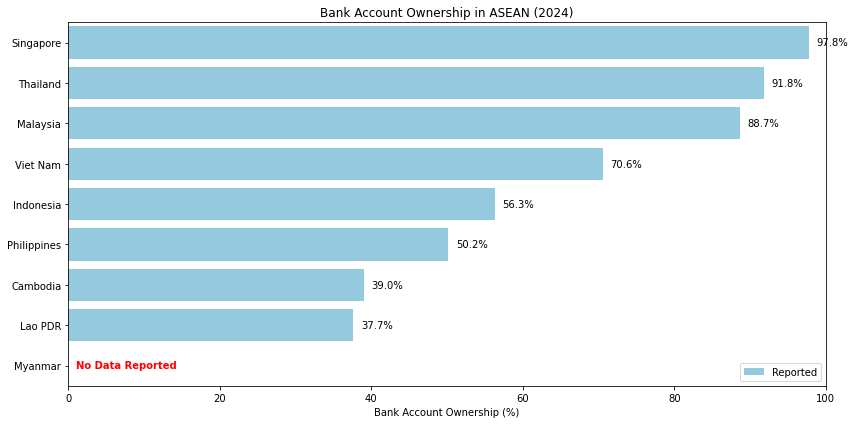

In [11]:
# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_total,
    x=2024,
    y='Country Name',
    color='skyblue',
    ci=None
)

# Add labels manually
for i, (value, name) in enumerate(zip(df_total[2024], df_total['Country Name'])):
    if pd.notna(value) and value > 0:
        ax.text(
            value + 1,  # position a bit after the bar
            i,          # y position
            f'{value:.1f}%', 
            va='center'
        )
    else:
        ax.text(
            1,         # near the start
            i, 
            'No Data Reported',
            va='center',
            color='red',
            fontweight='bold'
        )

plt.title('Bank Account Ownership in ASEAN (2024)')
plt.xlabel('Bank Account Ownership (%)')
plt.ylabel('')
plt.xlim(0, 100)
plt.legend(['Reported', 'Missing'], loc='lower right')
plt.tight_layout()
plt.show()

# Account Ownership, GDP and Population

In [12]:
# Filter df_gdp and df_pop to 2024 data

df_gdp_2024 = df_gdp[['Country Name', '2024']].copy()
df_gdp_2024 = df_gdp_2024.rename(columns={'2024': 'GDP per Capita (USD)'})

# Filter df_pop to 2021 data
df_pop_2024 = df_pop[['Country Name', '2024']].copy()
df_pop_2024 = df_pop_2024.rename(columns={'2024': 'Population (millions)'})

In [13]:
# Filter df_gdp_2024 and df_pop_2024 to ASEAN countries
# Define ASEAN countries list
asean_countries = [
    'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam'
]

# Filter GDP
df_gdp_asean24 = df_gdp_2024[df_gdp_2024['Country Name'].isin(asean_countries)].copy()

# Filter Population
df_pop_asean24 = df_pop_2024[df_pop_2024['Country Name'].isin(asean_countries)].copy()

# Optional: check result
print(df_gdp_asean24.head())
print(df_pop_asean24.head())

    Country Name  GDP per Capita (USD)
106    Indonesia           4925.430488
123     Cambodia           2627.879697
129      Lao PDR           2123.979094
160      Myanmar           1359.259614
169     Malaysia          11867.258644
    Country Name  Population (millions)
106    Indonesia            283487931.0
123     Cambodia             17638801.0
129      Lao PDR              7769819.0
160      Myanmar             54500091.0
169     Malaysia             35557673.0


In [14]:
# Sort GDP in descending order
df_gdp_asean24 = df_gdp_asean24.sort_values('GDP per Capita (USD)', ascending=False)

# Sort population in descending order
df_pop_asean24 = df_pop_asean24.sort_values('Population (millions)', ascending=False)

# check result
print(df_gdp_asean24)
print(df_pop_asean24)

    Country Name  GDP per Capita (USD)
208    Singapore          90674.066633
169     Malaysia          11867.258644
233     Thailand           7345.135690
106    Indonesia           4925.430488
257     Viet Nam           4717.290287
187  Philippines           3984.831539
123     Cambodia           2627.879697
129      Lao PDR           2123.979094
160      Myanmar           1359.259614
    Country Name  Population (millions)
106    Indonesia            283487931.0
187  Philippines            115843670.0
257     Viet Nam            100987686.0
233     Thailand             71668011.0
160      Myanmar             54500091.0
169     Malaysia             35557673.0
123     Cambodia             17638801.0
129      Lao PDR              7769819.0
208    Singapore              6036860.0


In [15]:
# Filter: Account ownership, total + 2024 column
df_asean_2024 = (
    df_plot[
        (df_plot['Indicator'] == 'Account ownership, total')
    ][['Country Name', 2024]]
    .copy()
    .rename(columns={2024: 'Account Ownership (%)'})
)

# Optional: convert to numeric
df_asean_2024['Account Ownership (%)'] = pd.to_numeric(
    df_asean_2024['Account Ownership (%)'], errors='coerce'
)

# Check result
print(df_asean_2024)

   Country Name  Account Ownership (%)
20    Singapore              97.819091
23     Thailand              91.824981
14     Malaysia              88.691801
26     Viet Nam              70.550753
2     Indonesia              56.327849
17  Philippines              50.182422
5      Cambodia              39.031443
8       Lao PDR              37.650197
11      Myanmar               0.000000


In [16]:
# merge df_asean + df_gdp
df_merge = pd.merge(df_asean_2024, df_gdp_asean24, on='Country Name', how='inner')

# then merge with df_pop
df_merge = pd.merge(df_merge, df_pop_asean24, on='Country Name', how='inner')

# check result
print(df_merge.head())

  Country Name  Account Ownership (%)  GDP per Capita (USD)  \
0    Singapore              97.819091          90674.066633   
1     Thailand              91.824981           7345.135690   
2     Malaysia              88.691801          11867.258644   
3     Viet Nam              70.550753           4717.290287   
4    Indonesia              56.327849           4925.430488   

   Population (millions)  
0              6036860.0  
1             71668011.0  
2             35557673.0  
3            100987686.0  
4            283487931.0  


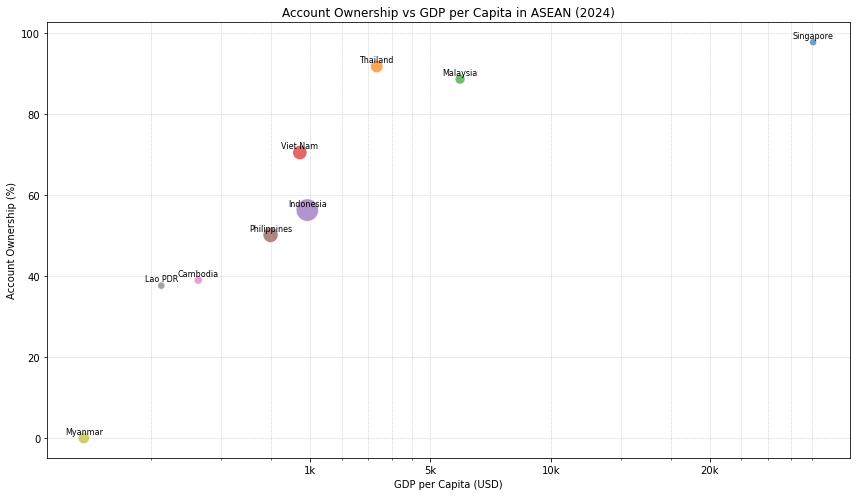

In [17]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=df_merge,
    x='GDP per Capita (USD)',
    y='Account Ownership (%)',
    size='Population (millions)',
    sizes=(50, 500),  # adjust bubble sizes
    hue='Country Name',
    palette='tab10',
    alpha=0.7
)

plt.title('Account Ownership vs GDP per Capita in ASEAN (2024)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Account Ownership (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Use log scale for GDP to compress outliers
plt.xscale('log')
plt.xticks(
    [5000, 10000, 20000, 50000],
    ['1k', '5k', '10k', '20k', '50k']
)

# annotate
for _, row in df_merge.iterrows():
    plt.text(
        row['GDP per Capita (USD)'],
        row['Account Ownership (%)'] + 1,  # slight offset
        row['Country Name'],
        fontsize=8,
        ha='center'
    )
    
plt.legend().remove()
plt.tight_layout()
plt.show()

# Gender Gap in Account Ownership

In [18]:
# ✅ Keep only the MALE & FEMALE account ownership rows
df_gap = df_plot[
    df_plot['Indicator'].isin(['Account ownership, male', 'Account ownership, female'])
].copy()

# ✅ Clean column names
df_gap.columns = df_gap.columns.astype(str).str.strip()

# ✅ Clean Indicator values (remove spaces)
df_gap['Indicator'] = df_gap['Indicator'].str.strip()

# ✅ Pivot to wide format
df_gap_wide = (
    df_gap.pivot(index='Country Name', columns='Indicator', values='2024')
    .reset_index()
)

# ✅ Clean column names (flatten after pivot)
df_gap_wide.columns = [str(c).strip() for c in df_gap_wide.columns]

# ✅ Rename columns for readability (optional)
df_gap_wide.rename(columns={
    'Account ownership, male': 'Account Ownership Male',
    'Account ownership, female': 'Account Ownership Female'
}, inplace=True)

# ✅ Compute gender gap
df_gap_wide['Gender Gap'] = (
    df_gap_wide['Account Ownership Male'] -
    df_gap_wide['Account Ownership Female']
)

# ✅ Sort by Gender Gap (optional)
df_gap_wide = df_gap_wide.sort_values('Gender Gap', ascending=False)

# ✅ Show result
print(df_gap_wide[['Country Name', 'Account Ownership Male', 'Account Ownership Female', 'Gender Gap']])

  Country Name  Account Ownership Male  Account Ownership Female  Gender Gap
0     Cambodia               41.580571                 36.798884    4.781687
8     Viet Nam               71.249331                 69.884416    1.364916
3     Malaysia               89.141358                 88.226470    0.914888
6    Singapore               98.022859                 97.607834    0.415025
4      Myanmar                0.000000                  0.000000    0.000000
7     Thailand               90.918245                 92.700069   -1.781824
1    Indonesia               54.638812                 58.030845   -3.392033
2      Lao PDR               31.709979                 43.586503  -11.876524
5  Philippines               43.042400                 57.101611  -14.059211


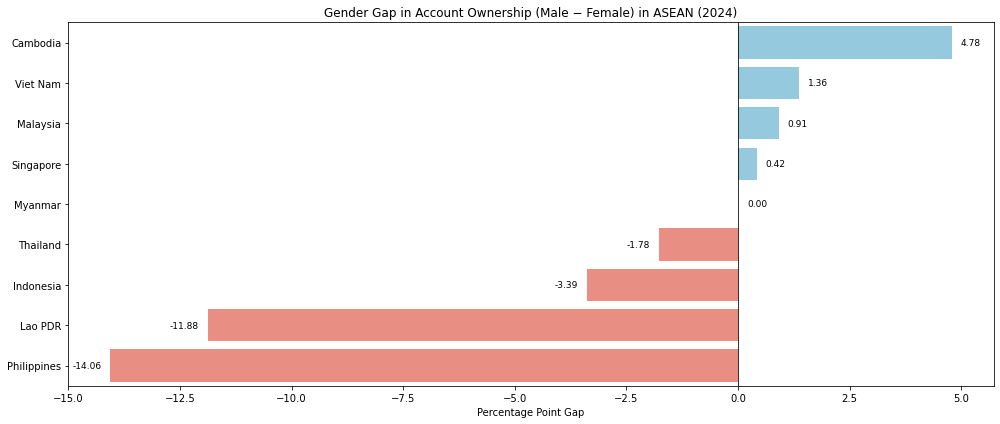

In [19]:
# ✅ Sort largest → smallest
df_gap_wide = df_gap_wide.sort_values('Gender Gap', ascending=False)

# ✅ Create color list: blue if gap ≥0, red if gap <0
bar_colors = [
    'skyblue' if gap >= 0 else 'salmon'
    for gap in df_gap_wide['Gender Gap']
]

# ✅ Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=df_gap_wide,
    x='Gender Gap',
    y='Country Name',
    palette=bar_colors
)

# ✅ Add vertical line at 0
plt.axvline(0, color='black', linewidth=0.8)

# ✅ Add labels on each bar
for i, (gap, name) in enumerate(zip(df_gap_wide['Gender Gap'], df_gap_wide['Country Name'])):
    ax.text(
        gap + (0.2 if gap >= 0 else -0.2),  # adjust offset slightly for clarity
        i,
        f'{gap:.2f}',
        va='center',
        ha='left' if gap >= 0 else 'right',
        fontsize=9,
        color='black'
    )

# ✅ Titles & labels
plt.title('Gender Gap in Account Ownership (Male − Female) in ASEAN (2024)')
plt.xlabel('Percentage Point Gap')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [20]:
# ✅ Clean column names
df_plot.columns = df_plot.columns.map(str).str.strip()

# ✅ Filter only `Account ownership, female`
df_female = df_plot[
    df_plot['Indicator'].str.strip().str.lower() == 'account ownership, female'
].copy()

# ✅ Keep only desired columns
df_female = df_female[['Country Name', '2014', '2024']].copy()

# ✅ Convert to numeric
df_female['2014'] = pd.to_numeric(df_female['2014'], errors='coerce')
df_female['2024'] = pd.to_numeric(df_female['2024'], errors='coerce')

# ✅ Drop rows where either year is NaN or 0
df_female_clean = df_female.dropna()
df_female_clean = df_female_clean[
    (df_female_clean['2014'] != 0) & (df_female_clean['2024'] != 0)
].copy()

# ✅ Compute absolute change
df_female_clean['% growth'] = df_female_clean['2024'] - df_female_clean['2014']

# ✅ Sort (optional)
df_female_clean = df_female_clean.sort_values('% growth', ascending=False)

# ✅ Display result
print(df_female_clean[['Country Name', '2014', '2024', '% growth']])

   Country Name       2014       2024   % growth
24     Viet Nam  32.031218  69.884416  37.853198
0     Indonesia  37.464034  58.030845  20.566811
15  Philippines  37.850297  57.101611  19.251314
21     Thailand  75.440296  92.700069  17.259773
3      Cambodia  20.497634  36.798884  16.301250
12     Malaysia  78.091299  88.226470  10.135171
18    Singapore  96.072117  97.607834   1.535717


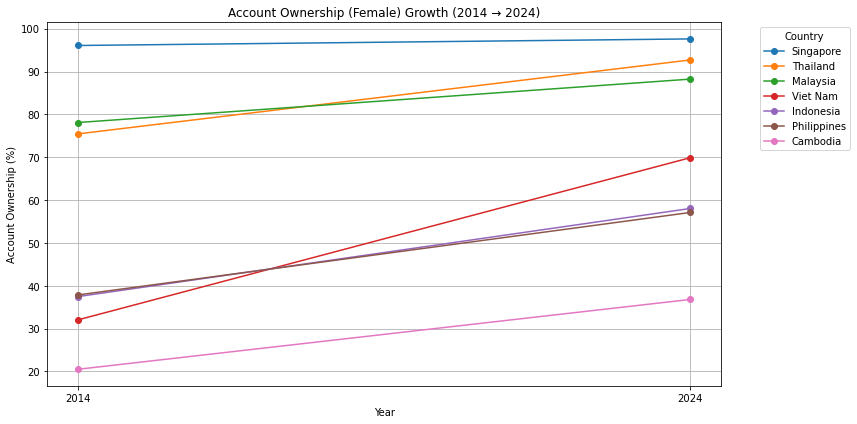

In [21]:
import matplotlib.pyplot as plt

# ✅ Sort by 2024 descending
df_female_sorted = df_female_clean.sort_values('2024', ascending=False)

# ✅ Set Country Name as index (optional, useful for plotting)
df_female_sorted = df_female_sorted.set_index('Country Name')

# ✅ Plot
plt.figure(figsize=(12, 6))

for country in df_female_sorted.index:
    plt.plot(
        ['2014', '2024'], 
        [df_female_sorted.loc[country, '2014'], df_female_sorted.loc[country, '2024']], 
        marker='o', 
        label=country
    )

plt.title('Account Ownership (Female) Growth (2014 → 2024)')
plt.xlabel('Year')
plt.ylabel('Account Ownership (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Urban vs Rural Account Ownership (%)

In [22]:
# 🔷 Filter only urban & rural
df_ur = df_plot[df_plot['Indicator'].isin([
    'Account ownership, urban', 'Account ownership, rural'])].copy()

# Pivot wider
df_ur_wide = df_ur.pivot(index='Country Name', columns='Indicator', values='2024').reset_index()

# Clean column names
df_ur_wide.columns = [c.strip().lower() for c in df_ur_wide.columns]

# Sort by urban level for better visual
df_ur_wide = df_ur_wide.sort_values('account ownership, urban', ascending=True)

# Print clean table
print(df_ur_wide.to_string(index=False))

country name  account ownership, rural  account ownership, urban
 Philippines                 46.455395                 56.572578
   Indonesia                 56.029753                 56.666099
     Lao PDR                 36.415864                 63.992379
    Cambodia                 34.038205                 65.241773
    Viet Nam                 67.368034                 77.013452
    Malaysia                 87.660140                 89.588584
    Thailand                 92.321667                 90.716247
   Singapore                       NaN                 97.819091


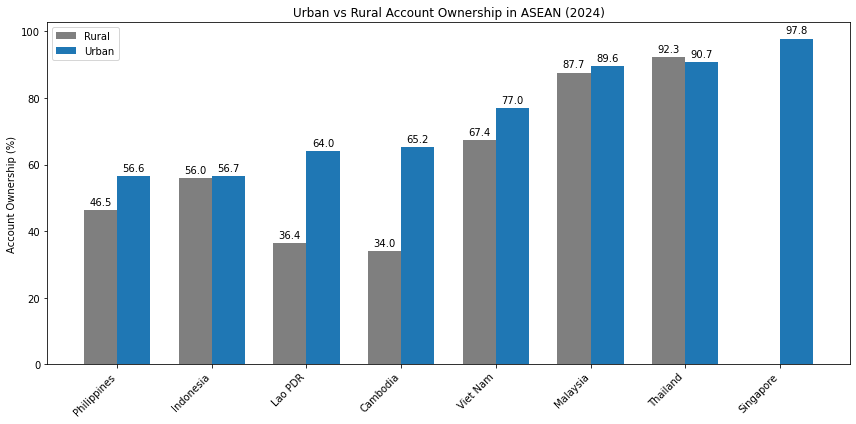

In [23]:
import numpy as np

# Data
countries = df_ur_wide['country name']
urban = df_ur_wide['account ownership, urban']
rural = df_ur_wide['account ownership, rural']

x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, rural, width, label='Rural', color='#7F7F7F')
bars2 = ax.bar(x + width/2, urban, width, label='Urban', color='#1F77B4')

ax.set_ylabel('Account Ownership (%)')
ax.set_title('Urban vs Rural Account Ownership in ASEAN (2024)')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()

# add labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3), textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Account Ownership (2014-2024)

In [24]:
# ✅ Clean column names
df_plot.columns = df_plot.columns.map(str).str.strip()

# ✅ Filter TOTAL rows
df_plot_all = df_plot[
    df_plot['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

# ✅ Keep relevant columns & make a copy
df_growth_all = df_plot_all[['Country Name', '2014', '2024']].copy()

# ✅ Convert to numeric
df_growth_all.loc[:, '2014'] = pd.to_numeric(df_growth_all['2014'], errors='coerce')
df_growth_all.loc[:, '2024'] = pd.to_numeric(df_growth_all['2024'], errors='coerce')

# ✅ Calculate growth
df_growth_all.loc[:, 'growth_2014_2024'] = df_growth_all['2024'] - df_growth_all['2014']

# ✅ Sort by growth (optional)
df_growth_all = df_growth_all.sort_values('growth_2014_2024', ascending=False)

# ✅ Display result
print(df_growth_all[['Country Name', '2014', '2024', 'growth_2014_2024']])

   Country Name       2014       2024  growth_2014_2024
26     Viet Nam  30.950947  70.550753         39.599807
2     Indonesia  36.058989  56.327849         20.268860
17  Philippines  31.285834  50.182422         18.896588
5      Cambodia  22.165266  39.031443         16.866177
23     Thailand  78.136554  91.824981         13.688428
14     Malaysia  80.674622  88.691801          8.017179
20    Singapore  96.352600  97.819091          1.466492
11      Myanmar  22.784195   0.000000        -22.784195
8       Lao PDR        NaN  37.650197               NaN


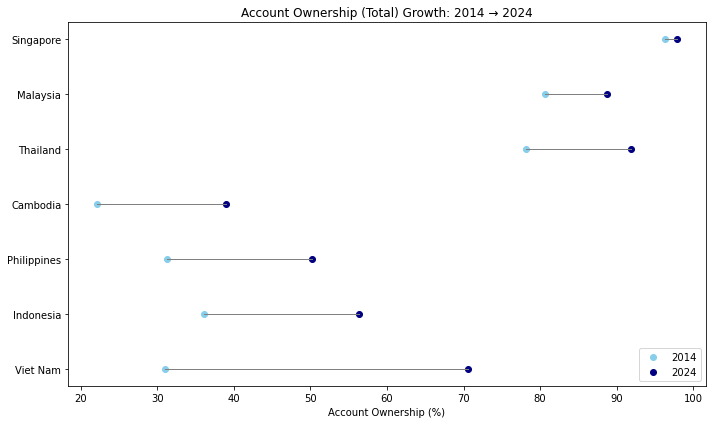

In [25]:
import matplotlib.pyplot as plt

# ✅ Filter data: drop rows with missing or zero
df_clean = df_growth_all.dropna(subset=['2014', '2024']).copy()
df_clean = df_clean[(df_clean['2014'] > 0) & (df_clean['2024'] > 0)]

# ✅ Optional: sort by growth descending
df_clean = df_clean.sort_values('growth_2014_2024', ascending=False)

# ✅ Plot
plt.figure(figsize=(10, 6))

plt.scatter(df_clean['2014'], df_clean['Country Name'], color='skyblue', label='2014')
plt.scatter(df_clean['2024'], df_clean['Country Name'], color='navy', label='2024')

for _, row in df_clean.iterrows():
    plt.plot(
        [row['2014'], row['2024']],
        [row['Country Name'], row['Country Name']],
        color='gray', linewidth=1
    )

plt.title('Account Ownership (Total) Growth: 2014 → 2024')
plt.xlabel('Account Ownership (%)')
plt.ylabel('')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Growth (2014-2024) vs GDP per Capita (USD)

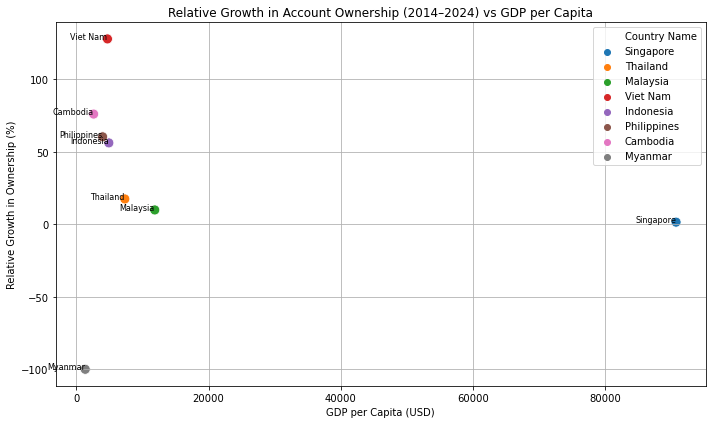

In [26]:
import seaborn as sns

# 🔷 Step 1: ownership growth
df_own = df_plot[
    df_plot['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

df_own = df_own[['Country Name', '2014', '2024']].copy()
df_own['2014'] = pd.to_numeric(df_own['2014'], errors='coerce')
df_own['2024'] = pd.to_numeric(df_own['2024'], errors='coerce')

# Relative growth %
df_own['relative_growth_%'] = ((df_own['2024'] - df_own['2014']) / df_own['2014']) * 100

# 🔷 Step 2: bring in GDP data
# assuming your GDP data is in df_gdp with columns: ['Country Name', 'GDP_per_capita']
df_own_gdp = pd.merge(
    df_own,
    df_gdp_asean24[['Country Name', 'GDP per Capita (USD)']],
    on='Country Name',
    how='inner'
)

# 🔷 Step 3: clean
df_own_gdp = df_own_gdp.dropna(subset=['relative_growth_%', 'GDP per Capita (USD)'])

# 🔷 Step 4: plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_own_gdp,
    x='GDP per Capita (USD)',
    y='relative_growth_%',
    hue='Country Name',
    s=100
)

# Annotate points
for _, row in df_own_gdp.iterrows():
    plt.text(
        row['GDP per Capita (USD)'],
        row['relative_growth_%'],
        row['Country Name'],
        fontsize=8,
        ha='right'
    )

plt.title('Relative Growth in Account Ownership (2014–2024) vs GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Relative Growth in Ownership (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Growth over time (2011-2024)

In [27]:
# Filter only Account (% age 15+) and select relevant columns
df_trend = df_plot[
    df_plot['Indicator'] == 'Account ownership, total'
][['Country Name', '2011', '2014', '2017', '2021', '2024']].copy()

# Rename columns
df_trend.columns = ['Country Name', '2011', '2014', '2017', '2021', '2024']

# Verify the columns
print(df_trend.columns.tolist())

# Melt the DataFrame to long format
df_long = df_trend.melt(
    id_vars='Country Name',
    value_vars=['2011', '2014', '2017', '2021', '2024'],
    var_name='Year',
    value_name='Account Ownership (%)'
)

# Extract year (if needed)
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})')

# Display the final result
print(df_long.to_string(index=False))

['Country Name', '2011', '2014', '2017', '2021', '2024']
Country Name  Year  Account Ownership (%)
   Singapore  2011              98.221892
    Thailand  2011              72.666436
    Malaysia  2011              66.173811
    Viet Nam  2011              21.369493
   Indonesia  2011              19.581991
 Philippines  2011              26.555926
    Cambodia  2011               3.659712
     Lao PDR  2011              26.773455
     Myanmar  2011                    NaN
   Singapore  2014              96.352600
    Thailand  2014              78.136554
    Malaysia  2014              80.674622
    Viet Nam  2014              30.950947
   Indonesia  2014              36.058989
 Philippines  2014              31.285834
    Cambodia  2014              22.165266
     Lao PDR  2014                    NaN
     Myanmar  2014              22.784195
   Singapore  2017              97.931171
    Thailand  2017              81.594001
    Malaysia  2017              85.343748
    Viet Nam  2017 

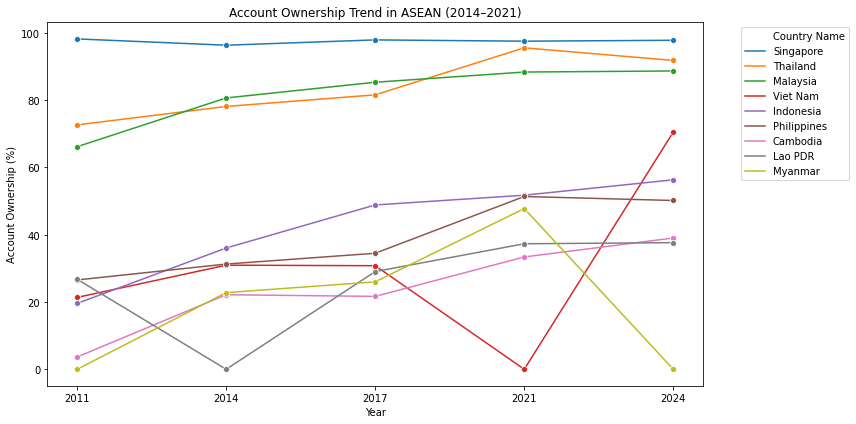

In [28]:
# Make sure it’s numeric
df_long['Account Ownership (%)'] = pd.to_numeric(
    df_long['Account Ownership (%)'], errors='coerce'
).fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_long,
    x='Year',
    y='Account Ownership (%)',
    hue='Country Name',
    marker='o'
)

plt.title('Account Ownership Trend in ASEAN (2014–2021)')
plt.ylabel('Account Ownership (%)')
plt.xlabel('Year')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ASEAN vs Global Averages

In [29]:
# Define the paths (replace with your full paths if needed)
file_global = '/Users/MarvelynAbigail/Documents/Summer 2025/Account ownership/Global_findex.xlsx'

# Read the files
df_global = pd.read_excel(file_global)

# Check data
print(df_global.head())

  Country ID          Country Name                 Indicator       2011  \
0        AFG           Afghanistan  Account ownership, total   9.005012   
1        AGO                Angola  Account ownership, total  39.203542   
2        ALB               Albania  Account ownership, total  28.268124   
3        ARE  United Arab Emirates  Account ownership, total  59.732370   
4        ARG             Argentina  Account ownership, total  33.130217   

        2014       2017       2021  2022       2024  
0   9.961001  14.893312   9.653822   NaN        NaN  
1  29.318121        NaN        NaN   NaN        NaN  
2  37.986352  40.015170  44.174174   NaN  46.069251  
3  83.743327  88.210391  85.742193   NaN  71.233854  
4  50.197294  48.708487  71.627086   NaN  81.744245  


In [30]:
# 🔷 Step 1: clean & unify column names
df_plot.columns = df_plot.columns.map(str).str.strip()
df_global.columns = df_global.columns.map(str).str.strip()

# 🔷 Step 2: filter TOTAL ownership
asean = df_plot[
    df_plot['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

global_ = df_global[
    df_global['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

# 🔷 Step 3: ensure year columns are numeric
year_cols = ['2014', '2017', '2021', '2024']

for year in year_cols:
    asean[year] = pd.to_numeric(asean[year], errors='coerce')
    global_[year] = pd.to_numeric(global_[year], errors='coerce')

# 🔷 Step 4: compute averages
asean_avg = asean[year_cols].mean()
global_avg = global_[year_cols].mean()

# 🔷 Step 5: create a table
df_table = pd.DataFrame({
    'ASEAN Average': asean_avg.round(2),
    'Global Average': global_avg.round(2)
}).reset_index().rename(columns={'index': 'Year'})

print(df_table)

   Year  ASEAN Average  Global Average
0  2014          49.80           55.51
1  2017          50.64           62.20
2  2021          62.89           70.78
3  2024          59.12           70.55


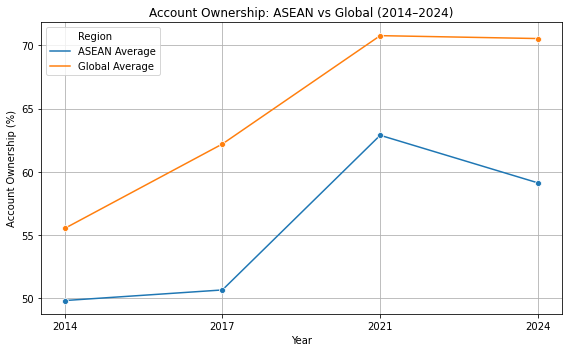

In [31]:
# 🔷 Step 1: melt table to long form
df_long = pd.melt(
    df_table,
    id_vars='Year',
    var_name='Region',
    value_name='Account Ownership'
)

# 🔷 Step 2: make sure Year is str for proper order
df_long['Year'] = df_long['Year'].astype(str)

# 🔷 Step 3: plot
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_long,
    x='Year',
    y='Account Ownership',
    hue='Region',
    marker='o'
)

plt.title('Account Ownership: ASEAN vs Global (2014–2024)')
plt.xlabel('Year')
plt.ylabel('Account Ownership (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
# 🔷 Step 1: clean & unify column names
df_plot.columns = df_plot.columns.map(str).str.strip()
df_global.columns = df_global.columns.map(str).str.strip()

# 🔷 Step 2: filter TOTAL ownership
asean = df_plot[
    df_plot['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

global_ = df_global[
    df_global['Indicator'].str.strip().str.lower() == 'account ownership, total'
].copy()

# 🔷 Step 3: ensure year columns are numeric
year_cols = ['2014', '2024']

for year in year_cols:
    asean[year] = pd.to_numeric(asean[year], errors='coerce')
    global_[year] = pd.to_numeric(global_[year], errors='coerce')

# 🔷 Step 4: compute averages
asean_avg = asean[year_cols].mean()
global_avg = global_[year_cols].mean()

# 🔷 Step 5: create a table
df_compare = pd.DataFrame({
    'ASEAN Average': asean_avg.round(2),
    'Global Average': global_avg.round(2)
}).reset_index().rename(columns={'index': 'Year'})

print(df_compare)

   Year  ASEAN Average  Global Average
0  2014          49.80           55.51
1  2024          59.12           70.55


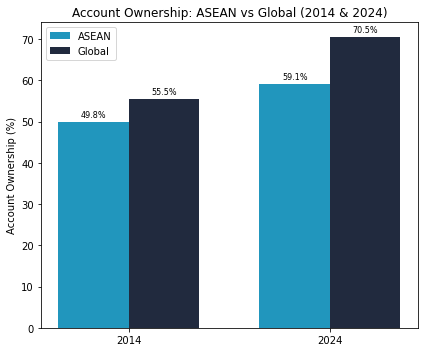

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data (from your df_compare)
years = ['2014', '2024']
asean = df_compare[df_compare['Year'].isin(years)]['ASEAN Average'].values
global_ = df_compare[df_compare['Year'].isin(years)]['Global Average'].values

# Bar positions
x = np.arange(len(years))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(6, 5))

# Bars
bars1 = ax.bar(x - width/2, asean, width, label='ASEAN', color='#2196bd')
bars2 = ax.bar(x + width/2, global_, width, label='Global', color='#212a3e')

# Labels
ax.set_ylabel('Account Ownership (%)')
#ax.set_xlabel('Year')
ax.set_title('Account Ownership: ASEAN vs Global (2014 & 2024)')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Add value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()